In [1]:
import random
random.seed(0)
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from sklearn import cluster
from itertools import count

In [2]:
N_CONTROLLER = 3

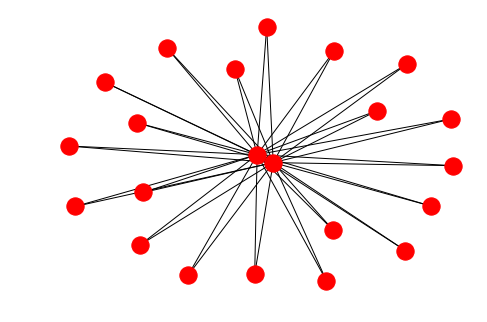

adjacent matrix
 [[0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0

In [3]:
G = nx.Graph()

name2idx = {}

with open('topology/unv1.cdp.txt') as f:
    for line in f:
        src, src_inf, dst, dst_inf = line.split(' ')
        if src not in name2idx:
            src_idx = len(name2idx)
            name2idx[src] = src_idx
            G.add_node(src_idx)
        else:
            src_idx = name2idx[src]
            
        if dst not in name2idx:
            dst_idx = len(name2idx)
            name2idx[dst] = dst_idx
            G.add_node(dst_idx)
        else:
            dst_idx = name2idx[dst]
        
        G.add_edge(src_idx, dst_idx, latency = random.random() * 30)

nx.draw(G)
plt.show()
one = nx.adjacency_matrix(G)
print('adjacent matrix\n', one.todense())
A = nx.adjacency_matrix(G, weight = 'latency')
mat = A.todense()
pairs = dict(nx.all_pairs_dijkstra_path_length(G, weight = 'latency'))

In [4]:
N_SDN = len(mat)
path_lens = np.zeros((N_SDN, N_SDN))
for i in range(N_SDN):
    for j in range(N_SDN):
        path_lens[i][j] = pairs[i][j]

In [5]:
nx.clustering(G, weight = 'latency')

{0: 0.048076810221356514,
 1: 0.5786593274023202,
 2: 0.555599597262752,
 3: 0.2246468876740982,
 4: 0.419058546632682,
 5: 0.48648836111361254,
 6: 0.465792726534962,
 7: 0.5931032504779249,
 8: 0.362781011323504,
 9: 0.6349550472520405,
 10: 0.5411009035382085,
 11: 0.4667102924606125,
 12: 0.4995298937628496,
 13: 0.7147015692485403,
 14: 0.5616570183570854,
 15: 0.26612539389492884,
 16: 0.6637949044221497,
 17: 0.0480768102213565,
 18: 0.6996830233146006,
 19: 0.24971746526923555,
 20: 0.6532896572386696,
 21: 0.4587352693040912}

In [6]:
algorithms = {}

algorithms['kmeans'] = cluster.KMeans(n_clusters = N_CONTROLLER)
algorithms['kmeans'].fit(path_lens)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [7]:
algorithms['kmeans'].labels_

array([1, 2, 0, 1, 2, 2, 2, 0, 1, 2, 2, 1, 1, 0, 2, 1, 0, 1, 0, 1, 0, 2], dtype=int32)

In [8]:
nx.set_node_attributes(G, {idx : val for (idx, val) in enumerate(algorithms['kmeans'].labels_)}, 'label')

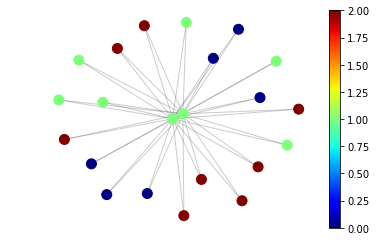

In [9]:
# get unique groups
groups = set(nx.get_node_attributes(G, 'label').values())
mapping = dict(zip(sorted(groups), count()))
nodes = G.nodes()
colors = [mapping[G.node[n]['label']] for n in nodes]

# drawing nodes and edges separately so we can capture collection for colobar
pos = nx.spring_layout(G)
ec = nx.draw_networkx_edges(G, pos, alpha = 0.2)
nc = nx.draw_networkx_nodes(G, pos, nodelist = nodes, node_color = colors, 
                            with_labels = False, node_size = 100, cmap = plt.cm.jet)
plt.colorbar(nc)
plt.show()